### Wstęp do Uczenia Maszynowego 
##### Laboratorium 12

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

### Voting & Stacking

### Zadanie 0
---


Dla danych (X, y) korzystając z metody `StackingClassifier` i `VotingClassifier` zbuduj dwa pipeline, które będą zakończone komitetami klasyfikatorów, zbudowanych z 4 różnych algorytmów uczenia maszynowego.

a) Jaka jest różnica w jakości poszczególnych modeli, a całego stackingu i votingu?

b) Czy algorytmy mają podobny wkład w ostateczną predykcję czy jeden z algorytmów dominuje?


In [6]:
X = pd.read_csv("../lab8/X.csv")
y = pd.read_csv("../lab8/y.csv")

In [7]:
y.loc[y.income == '<=50K.'] = '<=50K'
y.loc[y.income == '>50K.'] = '>50K'

In [8]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False))

])

col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat_pipeline', cat_pipeline, make_column_selector(dtype_include=np.object_))
    ])

model_pipeline = Pipeline([('preprocessing', col_trans),
                           ('stacking', StackingClassifier([
                                ('rf', RandomForestClassifier()),
                                ('log', LogisticRegression()),
                                ('tree', DecisionTreeClassifier()),
                                ('svc', SVC(probability=True))
                           ], final_estimator=LogisticRegression()))])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model_pipeline.fit(X_train, y_train)

c:\Users\frane\anaconda3\envs\ML\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\frane\anaconda3\envs\ML\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\frane\anaconda3\envs\ML\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\frane\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (sta

: 

: 

### $k$-średnich *($k$-means)*

###### $K$ - średnich jest prostym podejściem do podziału zbioru danych na $k$ odrębnych, nienakładających się skupień. Aby wykonać $k$ - średnich musimy najpierw określić żądaną liczbę skupień $k$; następnie algorytm algorytm $k$-średnich przypisze każdą obserwację do dokładnie jednego z $k$ skupień.


<img src="kmeans.png"  width="500"/>

###### *An Introduction to Statistical Learning with Applications in Python*


### Algorytm
1) *Ustalamy liczbę skupień*
2) *Ustalamy wstępne środki skupień*
3) *Obliczamy odległości obiektów (obserwacji) od środków skupień*
4) Przypisujemy obiekty do skupień
5) Ustalamy nowe środki skupień
6) Wykonujemy kroki 3), 4), 5) do czasu, aż warunek zatrzymania zostanie spełniony

<img src="centroids_iterations.webp"  width="600"/>

[*K-Means Clustering in Python: A Practical Guide*](https://realpython.com/k-means-clustering-python/)

### Dane

In [10]:
np.random.seed(0)
X = np.random.standard_normal((50, 2))
X[:25,0] += 3
X[:25,1] -= 4

<Axes: >

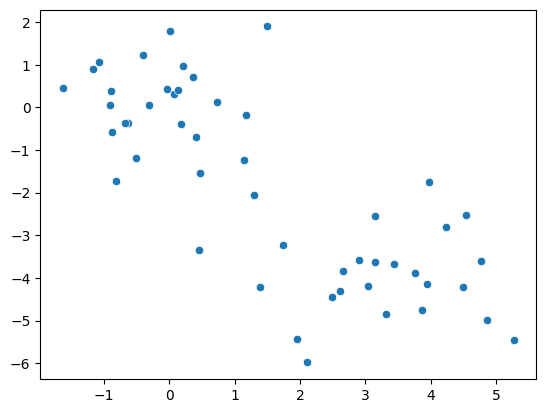

In [11]:
sns.scatterplot(x = X[:,0], y = X[:,1])

### Zadanie 1
---
Przygotuj model k-średnich dla liczby klastrów równej 2.
Użyj funkcji `KMeans()`. Przedstaw na wykresie przydział obserwacji do utworzonych skupień.

In [12]:
km = KMeans(n_clusters=2, random_state=2)

km.fit(X)

c:\Users\frane\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=2)

In [13]:
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

<Axes: >

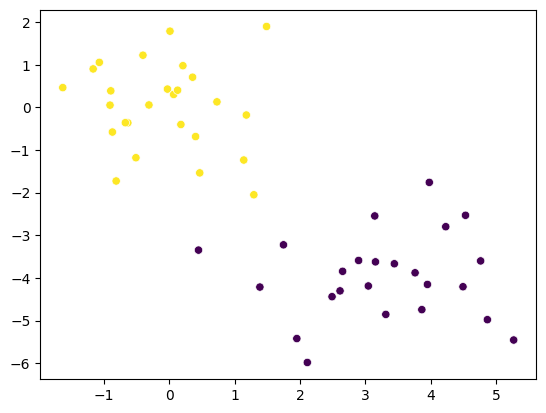

In [14]:
sns.scatterplot(x = X[:,0], y = X[:,1], c = km.labels_)

### Zadanie 2
---
Przygotuj model $k$-średnich dla k = 3. Narysuj wykres pokazujący przynależność obserwacji do utworzonych klastrów oraz zaznacz wyznaczone centroidy.

In [16]:
km_3 = KMeans(n_clusters=3, random_state=2, n_init=20)
km_3.fit(X)

KMeans(n_clusters=3, n_init=20, random_state=2)

<Axes: >

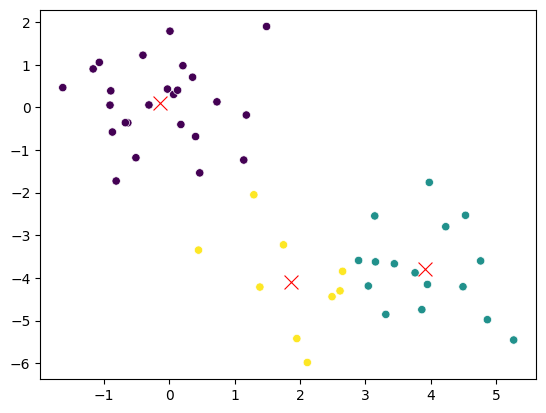

In [19]:
sns.scatterplot(x = X[:,0], y = X[:,1], c = km_3.labels_)
sns.scatterplot(x=km_3.cluster_centers_[:,0], y=km_3.cluster_centers_[:,1], color='red', marker='x', s=100)

### Zadanie 3
---
Za co jest odpowiedzialny parametr `n_init`? Porównaj model dla `n_init = 1` oraz `n_init = 20` używając `.interia_`.


In [23]:
results = []

for i in range(1, 21):
    km = KMeans(n_clusters=2, n_init=i)
    km.fit(X)
    results.append(km.inertia_)

c:\Users\frane\anaconda3\envs\ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\frane\anaconda3\envs\ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

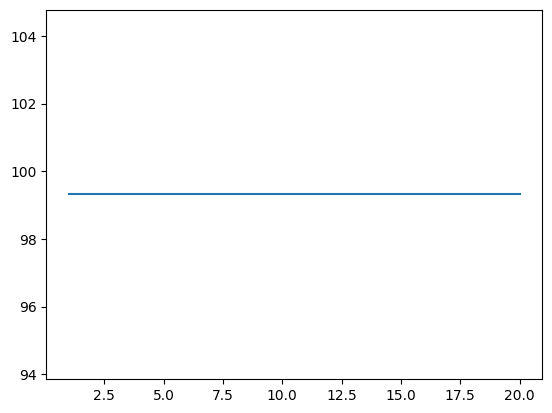

In [24]:
sns.lineplot(x=range(1,21), y=results)

### Jak wybrać optymalne $k$?

### Zadanie 4
---
Rozważ $k$ z przedziału `range(1, 11)`, przyygotuj dla zadanego $k$ model i wylicz SSE. Przedstaw rezultaty na wykresie.

In [25]:
sse = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, n_init=20)
    km.fit(X)
    sse.append(km.inertia_)

c:\Users\frane\anaconda3\envs\ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\frane\anaconda3\envs\ML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

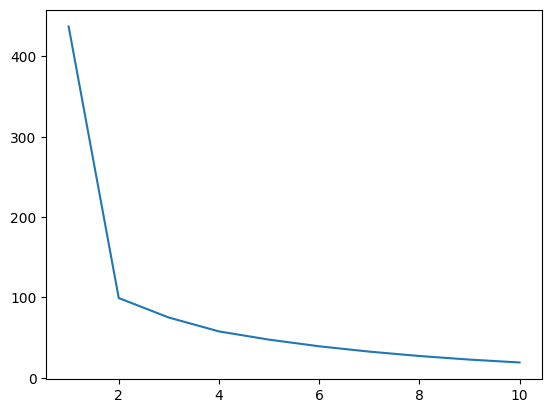

In [26]:
sns.lineplot(x=range(1,11), y=sse)